<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Ellis Huntley<br>
University of Manchester  
February 2021

We first initialise our Python interpreter

In [72]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [99]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

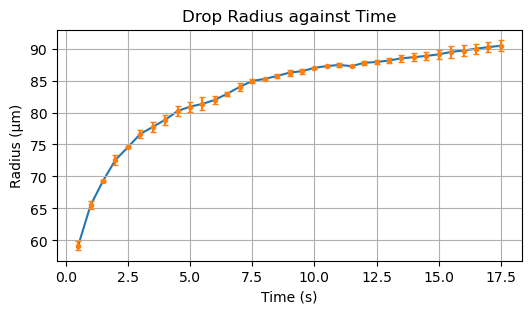

In [74]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
radius_data_array = np.array([radius_data1, radius_data2, radius_data3])
radius_error = np.std(radius_data_array, axis=0)
radius_mean = np.mean(radius_data_array, axis=0)
plt.plot(time, radius_mean, linestyle='-', zorder=0)
plt.errorbar(time, radius_mean, yerr=radius_error, fmt='.', capsize=2)
# setting axis labels & figures 
plt.xlabel("Time (s)")
plt.ylabel("Radius (\u03BCm)")
plt.title("Drop Radius against Time")
plt.grid()
# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

Text(0.5, 1.0, 'Speed Against Time Data')

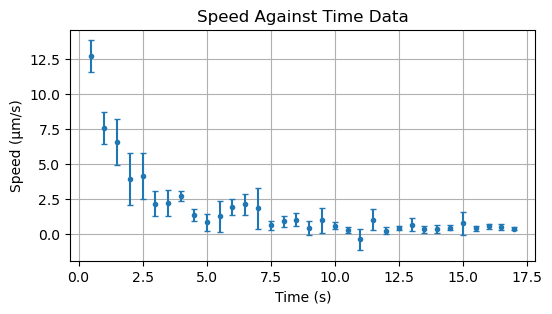

In [98]:
#calculating the derivative arrays
time_difference = np.diff(time)

speed1 = np.diff(radius_data1) / time_difference
speed2 = np.diff(radius_data2) / time_difference
speed3 = np.diff(radius_data3) / time_difference
speed_array = np.array([speed1, speed2, speed3])
speed_mean = np.mean(speed_array, axis=0)
speed_error = np.std(speed_array, axis=0)
#plotting the data
time = np.delete(time, -1, 0)
plt.errorbar(time, speed_mean, yerr=speed_error, fmt='.', capsize=2)

plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Speed (\u03BCm/s)')
plt.title('Speed Against Time Data')



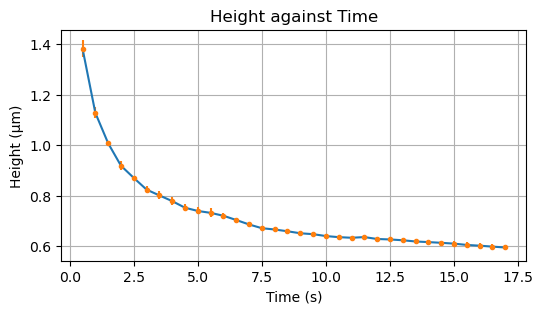

In [76]:
#solve volume equation for H
def height_function(radius_data):
    q = -(7.6 * 1000) * (6/np.pi)
    p = 3 * radius_data**2
    heights = (np.cbrt(-q/2 + np.sqrt(q**2/4 + p**3/27)) + np.cbrt(-q/2 - np.sqrt(q**2/4 + p**3/27)))
    return heights

heights1 = height_function(radius_data1)
heights2 = height_function(radius_data2)
heights3 = height_function(radius_data3)

heights_array = np.array([heights1, heights2, heights3])

heights_mean = np.mean(heights_array, axis=0)
heights_mean = np.delete(heights_mean, -1, 0)

heights_error = np.std(heights_array, axis=0)
heights_error = np.delete(heights_error, -1, 0)

#plotting the data
plt.plot(time, heights_mean)
plt.errorbar(time, heights_mean, yerr=heights_error, fmt='.', )
plt.xlabel('Time (s)')
plt.ylabel('Height (\u03BCm)')
plt.title('Height against Time')
plt.grid()
plt.show()

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

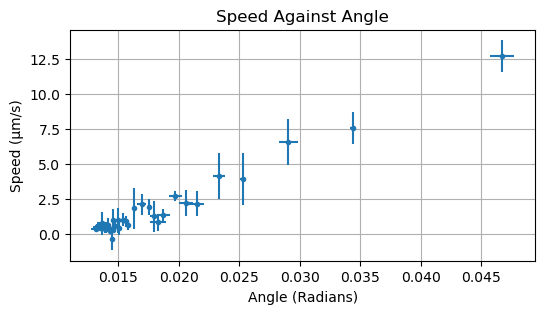

In [96]:
#calculating the contact angle and error
def contact_angle(radius, height):
    angle = np.pi/2 - np.arctan((radius**2 - height**2) / (2*height*radius))
    return angle

contact_angle1 = contact_angle(radius_data1, heights1)
contact_angle2 = contact_angle(radius_data2, heights2)
contact_angle3 = contact_angle(radius_data3, heights3)
contact_angle_array = np.array([contact_angle1, contact_angle2, contact_angle3])
angle_mean = np.mean(contact_angle_array, axis=0)
angle_error = np.std(contact_angle_array, axis=0)
#plots the data
angle_mean = np.delete(angle_mean, -1, 0)
plt.errorbar(angle_mean, speed_mean, yerr=speed_error, xerr=angle_error[1:], fmt='.')
plt.grid()
plt.xlabel('Angle (Radians)')
plt.ylabel('Speed (\u03BCm/s)')
plt.title('Speed Against Angle')
plt.show()

![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [95]:
#defines the two laws and fits the data
def cox_voinov_law(angle, mean_speed):
    
    params, errors = np.polyfit(angle**3, mean_speed, 1, cov=True)
    
    return params, errors

def de_Gennes_law(angle, mean_speed):
    
    params, errors = np.polyfit(angle**2, mean_speed, 1, cov=True)
    
    return params, errors


#calculates the values using the found parameters


params1, errors1 = cox_voinov_law(angle_mean, speed_mean)
params2, errors2 = de_Gennes_law(angle_mean, speed_mean)
char_speed1 = params1[0]
char_speed2 = params2[0]

equ_angle1 = np.cbrt(-params1[1] / params1[0])
equ_angle2 = np.sqrt(-params2[1] / params2[0])

def params_error_calc(params, errors):
    char_speed = params[0]
    c = params[1]
    c_error = np.sqrt(errors[1][1])
    char_speed_error = np.sqrt(errors[0][0])
    equ_angle_error = np.sqrt(((1/3) * np.cbrt(1 / (c**2 * char_speed)) * c_error)**2 + ((1/3) * np.cbrt((c / char_speed**4)) * char_speed_error)**2)
    return char_speed_error, equ_angle_error

char_speed1_error, equ_angle1_error = params_error_calc(params1, errors1)
char_speed2_error, equ_angle2_error = params_error_calc(params2, errors2)

print('According to the Cox-Voinov Law, the characteristic speed is {0:2.3f} +- {1:2.3f} \u03BCm/s and the equalibrium angle is {2:2.3f} +- {3:2.3f} radians. This result is unphysical.'.format(char_speed1, char_speed1_error, equ_angle1, equ_angle1_error))
print('According to the De Gennes Law, the characteristic speed is {0:2.3f} +- {1:2.3f} \u03BCm/s and the equalibrium angle is {2:2.3f} +- {3:2.3f} radians.'.format(char_speed2, char_speed2_error, equ_angle2, equ_angle2_error))


According to the Cox-Voinov Law, the characteristic speed is 134471.342 +- 8695.612 μm/s and the equalibrium angle is -0.016 +- 0.002 radians. This result is unphysical.
According to the De Gennes Law, the characteristic speed is 6571.447 +- 264.103 μm/s and the equalibrium angle is 0.010 +- 0.004 radians.


Displaying the corresponding fits  

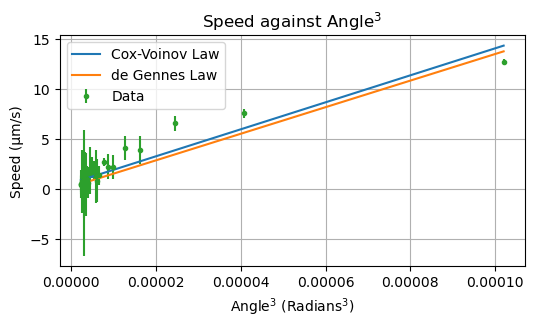

In [88]:
angle_values = np.linspace(np.min(angle_mean**3), np.max(angle_mean**3), 200, endpoint=True)
angle_values2 = np.linspace(np.min(angle_mean**2), np.max(angle_mean**2), 200, endpoint=True)
print()

plt.plot(angle_values, np.polyval(params1, angle_values), label='Cox-Voinov Law')
plt.plot(angle_values, np.polyval(params2, angle_values2), label='de Gennes Law')
plt.errorbar(angle_mean**3, speed_mean, label='Data', yerr=3*(speed_error/speed_mean), fmt='.')
plt.legend()
plt.grid()
plt.xlabel('Angle$^3$ (Radians$^3$)')
plt.ylabel('Speed (\u03BCm/s)')
plt.title('Speed against Angle$^3$')
plt.show()

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

In [92]:
cvl = params1[0]*angle_mean**3 + params1[1]
dgl = params2[0]*angle_mean**2 + params2[1]

def chi_square_calculator(observation, prediction, uncertainity):
    chi_square = np.sum((observation - prediction)**2 / (uncertainity**2))
    return chi_square

cvl_reduced_chi_square = chi_square_calculator(speed_mean, cvl, speed_error) / (len(speed_mean) - 2)
dgl_reduced_chi_square = chi_square_calculator(speed_mean, dgl, speed_error) / (len(speed_mean) -2)
print('The reduced chi squared of the data with Cox-Voinov Law is {0:2.3f}'.format(cvl_reduced_chi_square))
print('The reduced chi squared of the data with De Gennes Law is {0:2.3f}'.format(dgl_reduced_chi_square))



The reduced chi squared of the data with Cox-Voinov Law is 3.495
The reduced chi squared of the data with De Gennes Law is 1.069


![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because ...  

In [97]:
if np.abs(cvl_reduced_chi_square - 1) > np.abs(dgl_reduced_chi_square - 1):
    print('The reduced chi squared from de Gennes law is closer to 1, therefore it is the best model.')
else:
    print('The reduced chi squared from the Cov-Voinov is closer to 1, therefore it is the best model.')

The reduced chi squared from de Gennes law is closer to 1, therefore it is the best model.


![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 